In [541]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from stravalib.client import Client

In [561]:
# Prepare data frames
df = pd.DataFrame(columns=['start_date', 'id', 'elapsed_time', 'map'])
df_temp = pd.DataFrame(columns=df.columns)

In [543]:
# Setup access to Strava API
with open('config.json') as data_file:    
    passwords = json.load(data_file)

client = Client()
access_token = passwords['passwords'][0]['access_token']
client_id = passwords['passwords'][1]['client_id']
client_secret = passwords['passwords'][2]['client_secret']

client.access_token = access_token

In [629]:
# Fetch activity data from Strava_API
for activity in client.get_activities():
    df_temp['start_date'] = [activity.start_date_local]
    df_temp['id'] = [activity.id]
    df_temp['elapsed_time'] = [activity.elapsed_time]
    df_temp['map'] = [activity.map]
    df = df.append(df_temp, ignore_index=True)

In [760]:
# Analize data from Strava 
thresholds = [30, 100] # Lower and upper threshold

thresh_lower = np.timedelta64(thresholds[0],"m")  # Lower bound in minutes
thresh_upper = np.timedelta64(thresholds[1],"m")  # Upper bound in minutes

mask = df['elapsed_time'][20:].apply(lambda x: 
                                     True if (x > thresh_lower and x < thresh_upper) 
                                     else False)

df_filt = df.where(mask)
df_filt = df_filt.dropna()

mean_duration = df_filt['elapsed_time'].mean().to_timedelta64().astype('timedelta64[m]')

print('Mean Commute Duration: %s' %(mean_duration))

Mean Commute Duration: 59 minutes


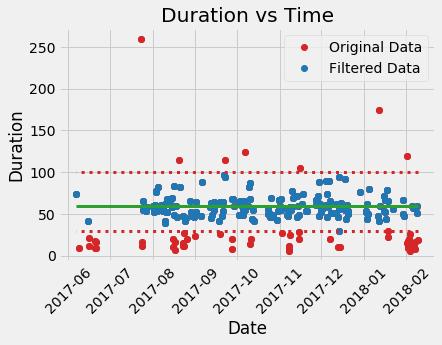

In [762]:
dates = [pd.to_datetime(d) for d in df['start_date']]
durations = df['elapsed_time'].astype('timedelta64[m]')

dates_filt = [pd.to_datetime(d) for d in df_filt['start_date']]
durations_filt = df_filt['elapsed_time'].astype('timedelta64[m]')


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot_date(x=dates,
              y=durations,
              c='tab:red',
              label='Original Data')

ax1.plot_date(x=dates_filt,
              y=durations_filt,
              c='tab:blue',
              label='Filtered Data')

# Mean
plt.plot_date(x=[dates[0], dates[-1]], 
              y=[mean_duration, mean_duration],
              marker=None,
              ls='-',
              linewidth=3,
              c='tab:green')

# Fitler Lines
plt.plot_date(x=[dates[0], dates[-1]], 
              y=[thresholds[0], thresholds[0]],
              marker=None,
              ls=':',
              linewidth=3,
              c='tab:red')

plt.plot_date(x=[dates[0], dates[-1]], 
              y=[thresholds[1], thresholds[1]],
              marker=None,
              ls=':',
              linewidth=3,
              c='tab:red')

# ax1.plot_date(x=[dates[0],dates[-1]],
#               y=30,
#               c='red')


# Labels and Style
plt.style.use('fivethirtyeight')
plt.legend();
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Duration')
plt.title('Duration vs Time')
plt.show()

<class 'pandas._libs.tslib.Timestamp'>


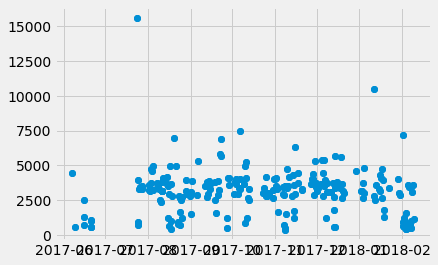

In [631]:
import matplotlib

dates = [pd.to_datetime(d) for d in df['start_date']]

plt.plot_date(dates, df['elapsed_time'].astype('timedelta64[s]'))

In [475]:
filtered_array.size - np.count_nonzero(np.isnat(filtered_array))

168

#Average commute time using CalTrain is 1:00 using 168 commutes for data

In [587]:
print(df['map'][1].summary_polyline)
print(df['id'][1])

cvlcFpvehVm@cE~IsU|NiIxBgEh@eHzt@VQ~LzMw@|D_[rTsk@lHuIfMmChHuGrN`TrMzEhV{v@bPyj@hSa_ADgL{Ey`@b]giCjNa\|Qg{@FoMwEkYMgzB~AiHrOwXz@ui@j}@CzQik@d@o[pEqMhLeIjkBc{@eEaVj@aBuIyZztAsfBr[z`@x]@?mEfFh@
1398534051
